<a href="https://colab.research.google.com/github/pedrorotta/procesamiento_de_imagenes/blob/main/Procesamiento_mediante_filtros_espaciales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#configuración
#Conectar google drive: google.colab import drive /content/drive

In [1]:
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
root = '/content/drive/MyDrive/Curso procesamiento'

In [6]:
# El comando chdir selecciona un nuevo directorio principal
os.chdir(root)
#Con el comando listdir podemos observar las carpetas o archivos de dicho directorio
#os.listdir()
#list_dir = os.listdir()

In [7]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt
from PIL import Image

#**Funciones propias**

In [8]:
def showrgb(image = None, title = 'Image', size = 4 ):
  #Creada para poder visualizar la imágen rgb. 
  w,h = image.shape[1],image.shape[0]
  aspect_ratio = w/h
  plt.figure(figsize = (size*aspect_ratio,size))
  plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()

In [ ]:
def showhsv(image = None, title = 'Image', size = 4 ):
  #Creada para poder visualizar la imágen rgb. 
  w,h = image.shape[1],image.shape[0]
  aspect_ratio = w/h
  plt.figure(figsize = (size*aspect_ratio,size))
  plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2HSV))
  plt.title(title)
  plt.show()

#**Filtros espaciales.**

En este capítulo exploraremos los siguientes objetivos:


## Objetivos:

*  Convolución

## **Convolución**

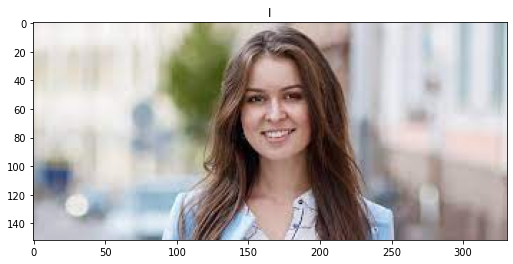

In [9]:
chica = cv2.imread('images/img1.jpg')
showrgb(chica,'I')

In [ ]:
len(chicag[1])

331

In [ ]:
len(chicag[1][0:int(len(chicag[1])/2)])

165

165


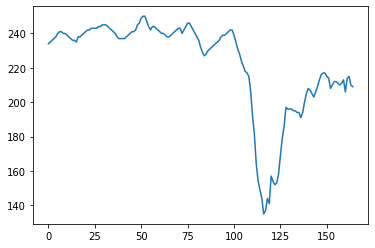

In [10]:
chicag = cv2.cvtColor(chica,cv2.COLOR_BGR2GRAY)
chicaf = chicag.flatten()
w = len(chicag[1][0:int(len(chicag[1])/2)])
print(w)
x = range(0,w)
plt.plot(x,chicaf[:w])
plt.show()

Matriz de convolución
```
h(x,y) = [[(i-1,j+1) ,  (i,j+1) , (i+1,j+1) ],
           [(i-1,j)   ,   (i,j)  ,  (i+1,j) ],
           [(i-1,j-1)   ,  (i,j-1) , (i+1,j-1)]]
```
La intensidad de la nueva imagen en la posición I(x,y) vendrá dada por:

I(0,0) = 50h(i-1,j+1) + 50h(i,j+1) + 63h(i+1,j+1) + 50h(i-1,j) + 50h(i,j) + 63h(i+1,j) + 157h(i-1,j-1) + 157h(i,j-1) + 200h(i+1,j-1)



### ***Filtro de suavizado (Smoothing Filter)***

#### ***Box Filter***

In [ ]:
'''
 También llamado Mean Filter
 Tomará un promedio de las intensidades de pixeles vecinos más cercanos
 El pixel con intensidad I(x,y) será reemplazado por el valor obtenido luego
 de la convolución.

 Matriz convolución
 h(x,y) = Ones(n)/n^2
 h(x,y) = 1/9*[[1,1,1],
              [1,1,1],
              [1,1,1]]
'''

In [ ]:
def BOX(I):
  I = I.copy()
  #dimensiones de la imagen de entrada
  m = I.shape[0]
  n = I.shape[1]
  #matriz igual a imagen de entrada, pero son filas y columnas adicionales llenas de ceros
  Mat_ope = np.zeros((m+2,n+2))
  Mat_ope[1:-1,1:-1] = I
  global Mat_conv
  Mat_conv = np.zeros((m,n))
  #h(i,j) se toma el pixel central h(1,1) el cual se ubicará en I(0,0)
  for i in range(1,m+1):
    for j in range(1,n+1):
      Conv_act = 1/9*(Mat_ope[i][j]+Mat_ope[i][j-1]+Mat_ope[i][j+1]+Mat_ope[i+1][j]+Mat_ope[i+1][j-1]
                    +Mat_ope[i+1][j+1]+Mat_ope[i-1][j]+Mat_ope[i-1][j+1]+Mat_ope[i-1][j-1])
      #guardar cada valor de la convolución en una nueva matriz (nueva imagen J(x,y)) empezando desde (0,0)
      Mat_conv[i-1,j-1] = Conv_act
  #convierte la matriz en imagen de 0-255 
  Mat_conv = np.uint8(Mat_conv)
  return Mat_conv

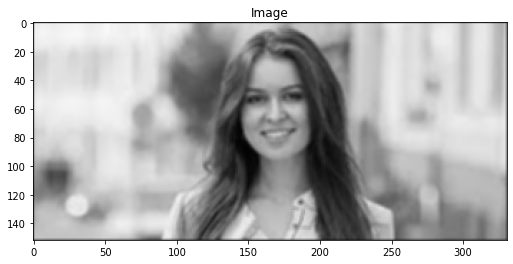

In [ ]:
chicablurring = BOX(chicag)
showrgb(chicablurring)

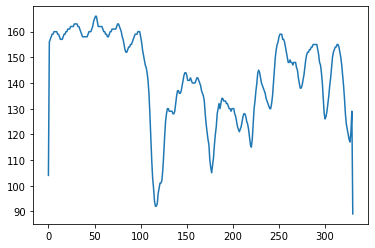

In [ ]:
chicablurringf = chicablurring.flatten()
plt.plot(x,chicablurringf[:w])
plt.show()

In [ ]:
I_pru1= np.uint8([[153,153,128,128,15,15],
                  [153,153,128,128,15,15],
                  [220,201,201,98,98,190],
                  [220,201,201,98,98,190],
                  [255,255,215,215,67,67],
                  [153,255,215,215,67,67]])

In [ ]:
I_conejo=np.uint8([[121,54,54,121,121,54,54,121],
                   [121,54,54,121,121,54,54,121],
                   [121,121,54,121,121,54,121,121],
                   [121,54,255,54,54,255,54,121],
                   [54,54,54,54,54,54,54,54],
                   [54,54,54,255,255,54,54,54],
                   [121,54,54,54,54,54,54,121],
                   [121,121,121,121,121,121,121,121]])

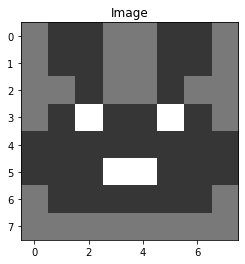

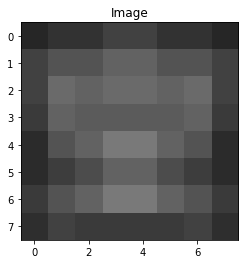

In [ ]:
I_pru1_suave=BOX(I_conejo)
#I_pru1_suave2 = cv2.boxFilter(I_conejo,-1,(3,3))
showrgb(I_conejo)
showrgb(I_pru1_suave)
#showrgb(I_pru1_suave2)

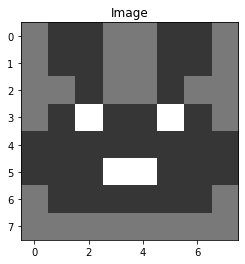

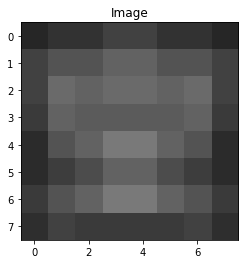

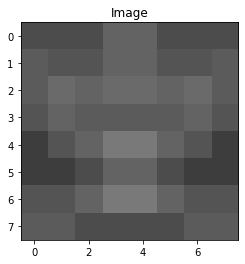

In [ ]:
I_conejo_suave=BOX(I_conejo)
I_conejo_suave2 = cv2.boxFilter(I_conejo,-1,(3,3))
showrgb(I_conejo)
showrgb(I_conejo_suave)
showrgb(I_conejo_suave2)
# la imagen obtenida usando el filtro de opencv se ve más uniforme porque los vecinos
# vacios los completa copiando el cortono de la imagen ya que la funcion SUAVE los completa con ceros?

In [ ]:
# boxfilter(scr,dst,ddepth,ksize,anchor,normalize,bordertype)
# boxfilter(Image,jpg,-1,(3,3),(-1,1),normalize=True,bordertype)

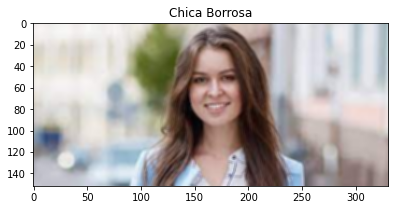

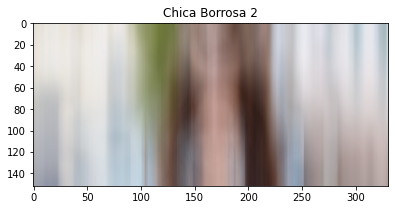

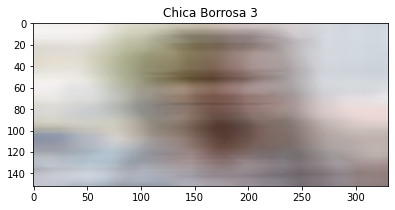

In [ ]:
chica1_blur = cv2.boxFilter(chica,-1,(3,3))
chica11_blur = cv2.boxFilter(chica,-1,(1,100))
chica12_blur = cv2.blur(chica, (100,1))

showrgb(chica1_blur,'Chica Borrosa',3)
showrgb(chica11_blur, 'Chica Borrosa 2',3)
showrgb(chica12_blur, 'Chica Borrosa 3',3)

#### ***Filtro de Promedio Ponderado***

In [ ]:
'''
Mismo concepto que la caja de filtro, pero esta vez los
pesos de la matriz de convolución cambian.
 h(x,y) = 1/16*[[1,2,1],
                [2,4,2],
                [1,2,1]]
'''

In [ ]:
def PONDERADO(I):
  I = I.copy()
  m = I.shape[0]
  n = I.shape[1]
  Mat_ope = np.zeros((m+2,n+2))
  Mat_ope[1:-1,1:-1] = I
  global Mat_conv
  Mat_conv = np.zeros((m,n))
  for i in range(1,m+1):
    for j in range(1,n+1):
      Conv_act = 1/16*(4*Mat_ope[i][j]+2*Mat_ope[i][j-1]+2*Mat_ope[i][j+1]+2*Mat_ope[i+1][j]+Mat_ope[i+1][j-1]
                    +Mat_ope[i+1][j+1]+2*Mat_ope[i-1][j]+Mat_ope[i-1][j+1]+Mat_ope[i-1][j-1])
      Mat_conv[i-1,j-1] = Conv_act
  Mat_conv = np.uint8(Mat_conv)
  return Mat_conv

In [ ]:
I_pru1_pond=PONDERADO(I_pru1)
showrgb(I_pru1)
showrgb(I_pru1_pond)

#### ***Filtro Gaussiano***

In [ ]:
'''
Usado para emborronar imágenes y eliminar ruido.
G(x,y) = (1/2*pi*sigma^2)*exp(-(x^2+y^2)/(2*sigma^2))
'''

In [ ]:
#Para esta función sigma=1
def GAUSS(I):
  I = I.copy()
  m = I.shape[0]
  n = I.shape[1]
  Mat_ope = np.zeros((m+3,n+3))
  Mat_ope[1:-2,1:-2] = I
  global Mat_conv
  Mat_conv = np.zeros((m,n))
  for i in range(1,m+1):
    for j in range(1,n+1):
      Conv_act = 1/273*(1*Mat_ope[i-2][j+2] + 4*Mat_ope[i-1][j+2]   + 7*Mat_ope[i][j+2]   + 4*Mat_ope[i+1][j+2]   + 1*Mat_ope[i+2][j+2]+
                        4*Mat_ope[i-2][j+1] + 16*Mat_ope[i-1][j+1]  + 26*Mat_ope[i][j+1]  + 16*Mat_ope[i+1][j+1]  + 4*Mat_ope[i+2][j+1]+
                        7*Mat_ope[i-2][j+0] + 26*Mat_ope[i-1][j+0]  + 41*Mat_ope[i][j+0]  + 26*Mat_ope[i+1][j+0]  + 7*Mat_ope[i+2][j+0]+
                        4*Mat_ope[i-2][j-1] + 16*Mat_ope[i-1][j-1]  + 26*Mat_ope[i][j-1]  + 16*Mat_ope[i+1][j-1]  + 4*Mat_ope[i+2][j-1]+
                        1*Mat_ope[i-2][j-2] + 4*Mat_ope[i-1][j-2]   + 7*Mat_ope[i][j-2]   + 4*Mat_ope[i+1][j-2]   + 1*Mat_ope[i+2][j-2])
      Mat_conv[i-1,j-1] = Conv_act
  Mat_conv = np.uint8(Mat_conv)
  return Mat_conv

In [ ]:
I_pru1_gauss = cv2.GaussianBlur(I_pru1,(5,5),1)
I_pru1_gauss2=GAUSS(I_pru1)
print(I_pru1)
print('****')
print(I_pru1_gauss2)
print('****')
print(I_pru1_gauss)
showrgb(I_pru1)
showrgb(I_pru1_gauss,'OpenCV',5)
showrgb(I_pru1_gauss2,'Funcion',5)


In [ ]:
I_pru1_gauss=GAUSS(I_conejo)
showrgb(I_conejo)
showrgb(I_pru1_gauss)

#### ***Median Filter***

In [ ]:
'''
La matriz de convolución tomará una región (usualmente 3x3) de la imagen de entrada,
esta es convertida en un vector 1D y posteriormente ordenando sus elementos desde menor
a mayor intensidad, se obtiene la mediana.
La mediana reemplaza al pixel de la imagen en el que se situó el pixel central de la matriz
convolución.
'''

In [ ]:
def MEDIAN(I):
  I=I.copy()
  m = I.shape[0]
  n = I.shape[1]
  Mat_ope = np.zeros((m+2,n+2))
  Mat_ope[1:-1,1:-1] = I
  global Mat_conv
  Mat_conv = np.zeros((m,n))
  for i in range(1,m+1):
    for j in range(1,n+1):
      Conv_act=np.array([[Mat_ope[i-1][j+1],Mat_ope[i][j+1],Mat_ope[i+1][j+1]],
                 [Mat_ope[i-1][j+0],Mat_ope[i][j+0],Mat_ope[i+1][j+0]],
                 [Mat_ope[i-1][j-1],Mat_ope[i][j-1],Mat_ope[i+1][j-1]]])
      Vec_des=Conv_act.flatten() #aplanando matriz
      Vec_ord = sorted(Vec_des) #Ordenando
      Mat_conv[i-1,j-1] = np.median(Vec_ord)
      Mat_conv = np.uint8(Mat_conv)
  return Mat_conv

In [ ]:
I= np.uint8([[174,124,31,71,85,105],
             [153,135,107,18,16,173],
             [220,21,201,255,98,190],
             [137,13,70,9,12,244],
             [255,200,13,103,76,67],
             [153,55,15,25,7,67]])

In [ ]:
I_median=MEDIAN(I)
showrgb(I)
showrgb(I_median)

#### ***Filtro maximo***

In [ ]:
def MAX(I):
  I=I.copy()
  m = I.shape[0]
  n = I.shape[1]
  Mat_ope = np.zeros((m+2,n+2))
  Mat_ope[1:-1,1:-1] = I
  global Mat_conv
  Mat_conv = np.zeros((m,n))
  for i in range(1,m+1):
    for j in range(1,n+1):
      Conv_act=np.array([[Mat_ope[i-1][j+1],Mat_ope[i][j+1],Mat_ope[i+1][j+1]],
                 [Mat_ope[i-1][j+0],Mat_ope[i][j+0],Mat_ope[i+1][j+0]],
                 [Mat_ope[i-1][j-1],Mat_ope[i][j-1],Mat_ope[i+1][j-1]]])
      Vec_des=Conv_act.flatten() #aplanando matriz
      Vec_ord = sorted(Vec_des) #Ordenando
      Mat_conv[i-1,j-1] = np.max(Vec_ord)
      Mat_conv = np.uint8(Mat_conv)
  return Mat_conv

#### ***Filtro minimo***

In [ ]:
def MIN(I):
  I=I.copy()
  m = I.shape[0]
  n = I.shape[1]
  Mat_ope = np.zeros((m+2,n+2))
  Mat_ope[1:-1,1:-1] = I
  global Mat_conv
  Mat_conv = np.zeros((m,n))
  for i in range(1,m+1):
    for j in range(1,n+1):
      Conv_act=np.array([[Mat_ope[i-1][j+1],Mat_ope[i][j+1],Mat_ope[i+1][j+1]],
                 [Mat_ope[i-1][j+0],Mat_ope[i][j+0],Mat_ope[i+1][j+0]],
                 [Mat_ope[i-1][j-1],Mat_ope[i][j-1],Mat_ope[i+1][j-1]]])
      Vec_des=Conv_act.flatten() #aplanando matriz
      Vec_ord = sorted(Vec_des) #Ordenando
      Mat_conv[i-1,j-1] = np.min(Vec_ord)
      Mat_conv = np.uint8(Mat_conv)
  return Mat_conv

### ***Detección de bordes***

#### ***Filtros 1era Derivada***

##### ***Operador de Robert***

In [ ]:
def ROBERT(I):
  I = I.copy()
  m = I.shape[0]
  n = I.shape[1]
  Mat_ope = np.zeros((m+1, n+1))
  #Mat_ope=I
  Mat_ope[0:m,0:n] = I
  global Mat_conv
  Mat_conv = np.zeros((m,n))
  for i in range(0,m):
    for j in range(0,n):
      Conv_act = Mat_ope[i][j+1]-Mat_ope[i+1][j]
      Mat_conv[i,j] = Conv_act

  Mat_opev = np.zeros((m+1,n+1))
  
  Mat_opev[0:m,0:n]= Mat_conv
  for i in range(0,m):
    for j in range(0,n):
      Conv_actv = -Mat_opev[i][j]+Mat_opev[i+1][j+1]
      Mat_conv[i,j] = Conv_actv
  Mat_conv = np.uint8(Mat_conv)
  return Mat_conv

In [ ]:
I= np.uint8([[174,124,31,71,85,105],
             [153,135,107,18,16,173],
             [220,21,201,255,98,190],
             [137,13,70,9,12,244],
             [255,200,13,103,76,67],
             [153,55,15,25,7,67]])

[[174 124  31  71  85 105]
 [153 135 107  18  16 173]
 [220  21 201 255  98 190]
 [137  13  70   9  12 244]
 [255 200  13 103  76  67]
 [153  55  15  25   7  67]]
***
[[115 177  53   8 233 173]
 [ 17  99  16 161 193 190]
 [242  64 236  79  11 244]
 [200 218  55 151  21  67]
 [224  67 175  16 196  67]
 [201 241 231 249 189   0]]


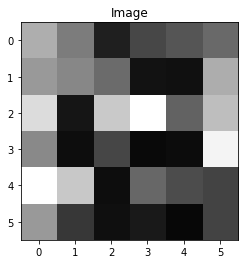

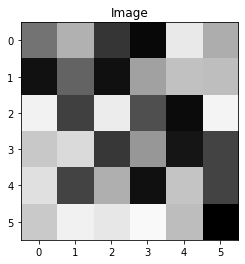

In [ ]:
A=ROBERT(I)
print(I)
print('***')
print(A)
showrgb(I)
showrgb(A)

##### ***Operador de Prewitt***

In [ ]:
def PREWITT(I):
  I = I.copy()
  m = I.shape[0]
  n = I.shape[1]
  Mat_ope = np.zeros((m+2,n+2))
  Mat_ope[1:-1,1:-1] = I
  global Mat_conv
  Mat_conv = np.zeros((m,n))
  for i in range(1,m+1):
    for j in range(1,n+1):
      Conv_act = -Mat_ope[i-1][j+1]-Mat_ope[i-1][j]-Mat_ope[i-1][j-1]+Mat_ope[i+1][j+1]+Mat_ope[i+1][j]+Mat_ope[i+1][j-1]
      Mat_conv[i-1,j-1] = Conv_act

  Mat_opev = np.zeros((m+2,n+2))
  Mat_opev[1:-1,1:-1] = Mat_conv
  for i in range(1,m+1):
    for j in range(1,n+1):
      Conv_actv = -Mat_opev[i-1][j+1]-Mat_opev[i][j+1]-Mat_opev[i+1][j+1]+Mat_opev[i-1][j-1]+Mat_opev[i][j-1]+Mat_opev[i+1][j+1]
      Mat_conv[i-1,j-1] = Conv_actv
  Mat_conv = np.uint8(Mat_conv)
  return Mat_conv

In [ ]:
I_PREWITT = PREWITT(I)
showrgb(I)
showrgb(I_PREWITT)

##### ***Operador de Sobel***

In [ ]:
def SOBEL(I):
  I = I.copy()
  m = I.shape[0]
  n = I.shape[1]
  Mat_ope = np.zeros((m+2,n+2))
  Mat_ope[1:-1,1:-1] = I
  global Mat_conv
  Mat_conv = np.zeros((m,n))
  for i in range(1,m+1):
    for j in range(1,n+1):
      Conv_act = -Mat_ope[i-1][j+1]-2*Mat_ope[i-1][j]-Mat_ope[i-1][j-1]+Mat_ope[i+1][j+1]+2*Mat_ope[i+1][j]+Mat_ope[i+1][j-1]
      Mat_conv[i-1,j-1] = Conv_act

  Mat_opev = np.zeros((m+2,n+2))
  Mat_opev[1:-1,1:-1] = Mat_conv
  for i in range(1,m+1):
    for j in range(1,n+1):
      Conv_actv = -Mat_opev[i-1][j+1]-2*Mat_opev[i][j+1]-Mat_opev[i+1][j+1]+Mat_opev[i-1][j-1]+2*Mat_opev[i][j-1]+Mat_opev[i+1][j+1]
      Mat_conv[i-1,j-1] = Conv_actv
  Mat_conv = np.uint8(Mat_conv)
  return Mat_conv

In [ ]:
#Con este operador se minimiza el error de la dirección del gradiente en cada pixel
def SOBEL_MEJOR(I):
  I = I.copy()
  m = I.shape[0]
  n = I.shape[1]
  Mat_ope = np.zeros((m+2,n+2))
  Mat_ope[1:-1,1:-1] = I
  global Mat_conv
  Mat_conv = np.zeros((m,n))
  for i in range(1,m+1):
    for j in range(1,n+1):
      Conv_act = 1/32*(-3*Mat_ope[i-1][j+1]-10*Mat_ope[i-1][j]-3*Mat_ope[i-1][j-1]+3*Mat_ope[i+1][j+1]+10*Mat_ope[i+1][j]+3*Mat_ope[i+1][j-1])
      Mat_conv[i-1,j-1] = Conv_act

  Mat_opev = np.zeros((m+2,n+2))
  Mat_opev[1:-1,1:-1] = Mat_conv
  for i in range(1,m+1):
    for j in range(1,n+1):
      Conv_actv = 1/32*(-3*Mat_opev[i-1][j+1]-10*Mat_opev[i][j+1]-3*Mat_opev[i+1][j+1]+3*Mat_opev[i-1][j-1]+10*Mat_opev[i][j-1]+3*Mat_opev[i+1][j+1])
      Mat_conv[i-1,j-1] = Conv_actv
  Mat_conv = np.uint8(Mat_conv)
  return Mat_conv

In [ ]:
I_sobelm=SOBEL_MEJOR(I)
I_sobel=SOBEL(I) 
showrgb(I_sobel)
showrgb(I_sobelm)

#### ***Filtro de Laplace (Smoothing Filter)***

In [ ]:
def LAPLACE(I):
  I = I.copy()
  m = I.shape[0]
  n = I.shape[1]
  Mat_ope = np.zeros((m+2,n+2))
  Mat_ope[1:-1,1:-1] = I
  global Mat_conv
  Mat_conv = np.zeros((m,n))
  for i in range(1,m+1):
    for j in range(1,n+1):
      Conv_act = (-8*Mat_ope[i][j]+Mat_ope[i][j-1]+Mat_ope[i][j+1]+Mat_ope[i+1][j]+Mat_ope[i-1][j]+1*(Mat_ope[i+1][j+1]+Mat_ope[i-1][j]+Mat_ope[i-1][j+1]+Mat_ope[i-1][j-1]))
      Mat_conv[i-1,j-1] = Conv_act
  Mat_conv = np.uint8(Mat_conv)
  return Mat_conv

### **Función FiltrosDIP**

In [ ]:
def FiltrosDIP(image, type):
  if type == 'BOX':
    BOX(image)
    return Mat_conv
  elif type == 'PONDERADO':
    PONDERADO(image)
    return Mat_conv
  elif type == 'GAUSS':
    GAUSS(image)
    return Mat_conv
  elif type == 'MEDIAN':
    MEDIAN(image)
    return Mat_conv
  elif type == 'MAX':
    MAX(image)
    return Mat_conv
  elif type == 'MIN':
    MIN(image)
    return Mat_conv
  elif type == 'ROBERT':
    ROBERT(image)    
    return Mat_conv  
  elif type == 'PREWITT':
    PREWITT(image)
    return Mat_conv
  elif type == 'SOBEL':
    SOBEL(image)
    return Mat_conv
  elif type == 'SOBEL_MEJOR':
    SOBEL_MEJOR(image)
    return Mat_conv
  elif type == 'LAPLACE':
    LAPLACE(image)
    return Mat_conv
  else:
    print('BOX, PONDERADO, GAUSS, MEDIAN, MAX, MIN, ROBERT, SOBEL, SOBEL_MEJOR,PREWITT, LAPLACE')

In [ ]:
chica = FiltrosDIP(chica_gray, 'LAPLACE')
showrgb(chica,'',10)

In [ ]:
I=np.uint8([[20, 200, 100, 150],[175, 20, 130, 84],[16, 133, 189, 144],[205, 34, 255, 174]])

In [ ]:
A=FiltrosDIP(I,'LAPLACE')
showrgb(I)
showrgb(A)

In [ ]:
I_guinda=np.uint8([[140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140],
                   [140,140,140,140,140,140,140,140,140,140,140,140,140,45,45,140,140,140,140,140,45,45,140,140,140],
                   [140,140,140,140,140,140,140,140,140,140,140,140,45,45,45,45,140,140,140,45,45,45,45,140,140],
                   [140,140,45,140,140,140,140,45,140,140,140,45,45,140,140,45,45,140,45,45,140,140,45,45,140],
                   [140,45,140,140,140,140,140,140,45,140,140,45,45,140,140,45,45,140,45,45,140,140,45,45,140],
                   [140,45,45,45,45,45,45,45,45,140,140,45,45,45,45,45,45,140,45,45,140,140,45,45,140],
                   [140,140,45,45,45,45,45,45,140,140,140,140,45,45,45,45,140,140,45,45,140,140,45,45,140],
                   [140,140,140,45,45,45,45,140,140,140,140,45,45,140,140,45,45,140,45,45,140,140,45,45,140],
                   [140,140,140,45,45,45,45,140,140,140,140,45,45,140,140,45,45,140,45,45,140,140,45,45,140],
                   [140,140,140,45,45,45,45,140,140,140,140,45,45,140,140,45,45,140,140,45,45,45,45,140,140],
                   [140,140,140,140,45,45,140,140,140,140,140,140,45,45,45,45,140,140,140,140,45,45,140,140,140],
                   [140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140]])

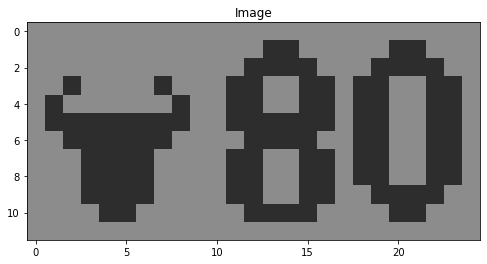

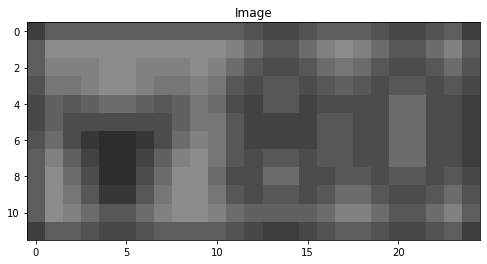

In [ ]:
I_guinda_l=FiltrosDIP(I_guinda,'BOX')
showrgb(I_guinda)
showrgb(I_guinda_l)

### OTROS

In [ ]:
#imfilter(imagen,filtro) = imfilter(A,B)

ENFOQUE=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])                                        #ENFOQUE
DESENFOQUE=np.array([[1,1,1],[1,1,1],[1,1,1]])                                         #DESENFOQUE
REALCE=np.array([[0,0,0],[-1,1,0],[0,0,0]])                                            #REALCE DE BORDES
REPUJADO=np.array([[-2,-1,0],[-1,1,1],[0,1,2]])                                        #REPUJADO = BISELADO?

SOBEL_V=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])                                         #SOBEL VERTICAL
SOBEL_H=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])                                         #SOBEL HORIZONTAL
SOBEL_MH=np.array([[-3,-10,-3],[0,0,0],[3,10,3]])*1/32

SHARPEN=np.array([[1,-2,1],[-2,5,-2],[1,-2,1]])                                       #SHARPEN
NORTE=np.array([[1,1,1],[1,-2,1],[-1,-1,-1]])                                          #FILTRO NORTE
ESTE=np.array([[-1,1,1],[-1,-2,1],[-1,1,1]])                                           #FILTRO ESTE

GAUSS=np.array([[1,2,3,1,1],[2,7,11,7,2],[3,11,17,11,3],[2,7,11,7,1],[1,2,3,2,1]])     #GAUSS
GAUSS2=np.array([[1,4,7,4,1],[4,16,26,16,4],[7,26,41,26,7],[4,16,26,16,4],[1,4,7,4,1]])*1/273     #GAUSS

PREWITT_H=np.array([[-1,-1,-1],[0,0,0],[1,1,1]]) 
PREWITT_V=np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

ROBERT1=np.array([[-1,0],[0,1]])
ROBERT2=np.array([[0,-1],[1,0]])

LAPLACE=np.array([[0,1,0],[1,-4,1],[0,1,0]])                                           #LAPLACE
LAPLACE_R=np.array([[0,1,0],[1,-5,1],[0,1,0]])
LAPLACE_C=np.array([[1,1,1],[1,-8,1],[1,1,1]])

PONDERADO=np.array([[1,2,1],[2,4,2],[1,2,1]])*1/16

In [ ]:
chica11=cv2.cvtColor(cv2.imread('img1.jpg'),cv2.COLOR_BGR2GRAY)
#estatuaLib1=cv2.cvtColor(cv2.imread('estatuaLib.jpg'),cv2.COLOR_BGR2RGB)
estatuaLib1=cv2.imread('estatuaLib.jpg')
estatuaLib=cv2.cvtColor(cv2.imread('estatuaLib.jpg'),cv2.COLOR_BGR2GRAY)

In [ ]:
ta=5

In [ ]:
########################################### ENFOQUE ###########################################
chica1_filtrada1= cv2.filter2D(chica1,-1,ENFOQUE)
chica1_filtrada11= cv2.filter2D(chica11,-1,ENFOQUE)

estatuaLib_filtrada1= cv2.filter2D(estatuaLib1,-1,ENFOQUE)
estatuaLib_filtrada11= cv2.filter2D(estatuaLib,-1,ENFOQUE)

showrgb(chica1_filtrada1,'Chica ENFOQUE1',ta)
showrgb(chica1_filtrada11,'Chica ENFOQUE2',ta)
showrgb(estatuaLib_filtrada1,'ESTATUA ENFOQUE1',ta)
showrgb(estatuaLib_filtrada11,'ESTATUA ENFOQUE2',ta)
#############################################################################################

In [ ]:
########################################### DESENFOQUE ###########################################
chica1_filtrada2= cv2.filter2D(chica1,-1,DESENFOQUE)
chica1_filtrada21= cv2.filter2D(chica11,-1,DESENFOQUE)

estatuaLib_filtrada2= cv2.filter2D(estatuaLib1,-1,DESENFOQUE)
estatuaLib_filtrada21= cv2.filter2D(estatuaLib,-1,DESENFOQUE)

showrgb(chica1_filtrada2,'Chica DESENFOQUE1',ta)
showrgb(chica1_filtrada21,'Chica DESENFOQUE2',ta)
showrgb(estatuaLib_filtrada2,'Libertad DESENFOQUE1',ta)
showrgb(estatuaLib_filtrada21,'Libertad DESENFOQUE2',ta)
#############################################################################################

In [ ]:
########################################### REALCE ###########################################

chica1_filtrada31= cv2.filter2D(chica11,-1,REALCE)

estatuaLib_filtrada31= cv2.filter2D(estatuaLib,-1,REALCE)

showrgb(chica1_filtrada31,'Chica REALCE',ta)
showrgb(estatuaLib_filtrada31,'Libertad REALCE',ta)
#############################################################################################

In [ ]:
########################################### REPUJADO ###########################################
chica1_filtrada4= cv2.filter2D(chica1,-1,REPUJADO)
chica1_filtrada41= cv2.filter2D(chica11,-1,REPUJADO)

estatuaLib_filtrada4= cv2.filter2D(estatuaLib1,-1,REPUJADO)
estatuaLib_filtrada41= cv2.filter2D(estatuaLib,-1,REPUJADO)

showrgb(chica1_filtrada4,'Chica REPUJADO',ta)
showrgb(chica1_filtrada41,'Chica REPUJADO1',ta)
showrgb(estatuaLib_filtrada4,'Libertad REPUJADO',ta)
showrgb(estatuaLib_filtrada41,'Libertad REPUJADO1',ta)
#############################################################################################

In [ ]:
########################################### SHARPEN ###########################################
chica1_filtrada8= cv2.filter2D(chica1,-1,SHARPEN)
chica1_filtrada81= cv2.filter2D(chica11,-1,SHARPEN)

estatuaLib_filtrada8= cv2.filter2D(estatuaLib1,-1,SHARPEN)
estatuaLib_filtrada81= cv2.filter2D(estatuaLib,-1,SHARPEN)

showrgb(chica1_filtrada8,'Chica SHARPEN',ta)
showrgb(chica1_filtrada81,'Chica SHARPEN1',ta)
showrgb(estatuaLib_filtrada8,'Libertad SHARPEN',ta)
showrgb(estatuaLib_filtrada81,'Libertad SHARPEN1',ta)
#############################################################################################

In [ ]:
########################################### NORTE ###########################################
chica1_filtrada9= cv2.filter2D(chica1,-1,NORTE)
chica1_filtrada91= cv2.filter2D(chica11,-1,NORTE)

estatuaLib_filtrada9= cv2.filter2D(estatuaLib1,-1,NORTE)
estatuaLib_filtrada91= cv2.filter2D(estatuaLib,-1,NORTE)

showrgb(chica1_filtrada9,'Chica NORTE',ta)
showrgb(chica1_filtrada91,'Chica NORTE1',ta)
showrgb(estatuaLib_filtrada9,'Libertad NORTE',ta)
showrgb(estatuaLib_filtrada91,'Libertad NORTE1',ta)

#############################################################################################

In [ ]:
########################################### ESTE ###########################################
chica1_filtrada10= cv2.filter2D(chica1,-1,ESTE)
chica1_filtrada101= cv2.filter2D(chica11,-1,ESTE)

estatuaLib_filtrada10= cv2.filter2D(estatuaLib1,-1,NORTE)
estatuaLib_filtrada101= cv2.filter2D(estatuaLib,-1,NORTE)

showrgb(chica1_filtrada10,'Chica ESTE',ta)
showrgb(chica1_filtrada101,'Chica ESTE1',ta)
showrgb(estatuaLib_filtrada10,'Libertad ESTE',ta)
showrgb(estatuaLib_filtrada101,'Libertad ESTE1',ta)
#############################################################################################

In [ ]:
########################################### SOBEL ###########################################
chica1_filtrada7= cv2.filter2D(chica11,-1,SOBEL_MH)
chica1_filtrada71= cv2.filter2D(chica11,-1,SOBEL_V)
chica1_filtrada72= cv2.filter2D(chica1_filtrada7,-1,SOBEL_V) #H+V

estatuaLib_filtrada7= cv2.filter2D(estatuaLib,-1,SOBEL_H)
estatuaLib_filtrada71= cv2.filter2D(estatuaLib,-1,SOBEL_V)
estatuaLib_filtrada72= cv2.filter2D(estatuaLib_filtrada7,-1,SOBEL_V) #H+V

showrgb(chica1_filtrada7,'Chica SOBEL_H',ta)
showrgb(chica1_filtrada71,'Chica SOBEL_V',ta)
showrgb(chica1_filtrada72,'Chica SOBEL HV',ta)

showrgb(estatuaLib_filtrada7,'Chica SOBEL_H',ta)
showrgb(estatuaLib_filtrada71,'Chica SOBEL_V',ta)
showrgb(estatuaLib_filtrada72,'Chica SOBEL HV',ta)
#############################################################################################

In [ ]:
########################################### ROBERT ##########################################
chica1_filtrada14= cv2.filter2D(chica11,-1,ROBERT1)
chica1_filtrada141= cv2.filter2D(chica11,-1,ROBERT2)
chica1_filtrada142= cv2.filter2D(chica1_filtrada14,-1,ROBERT2)

estatuaLib_filtrada14= cv2.filter2D(estatuaLib,-1,ROBERT1)
estatuaLib_filtrada141= cv2.filter2D(estatuaLib,-1,ROBERT2)
estatuaLib_filtrada142= cv2.filter2D(estatuaLib_filtrada14,-1,ROBERT2)

showrgb(chica1_filtrada14,'Chica ROBERT1',ta)
showrgb(chica1_filtrada141,'Chica ROBERT2',ta)
showrgb(chica1_filtrada142,'Chica ROBERT 12',ta)

showrgb(estatuaLib_filtrada14,'Libertad ROBERT1',ta)
showrgb(estatuaLib_filtrada141,'Libertad ROBERT2',ta)
showrgb(estatuaLib_filtrada142,'Libertad ROBERT 12',ta)

#############################################################################################

In [ ]:
########################################## PREWITT ##########################################
chica1_filtrada12= cv2.filter2D(chica11,-1,PREWITT_H)
chica1_filtrada121= cv2.filter2D(chica11,-1,PREWITT_V)
chica1_filtrada122= cv2.filter2D(chica11,-1,PREWITT_V)

estatuaLib_filtrada12= cv2.filter2D(estatuaLib,-1,PREWITT_H)
estatuaLib_filtrada121= cv2.filter2D(estatuaLib,-1,PREWITT_V)
estatuaLib_filtrada122= cv2.filter2D(estatuaLib_filtrada12,-1,PREWITT_V)

#showrgb(chica1_filtrada12,'Chica PREWITT_H',ta)
#showrgb(chica1_filtrada121,'Chica PREWITT_V',ta)
#showrgb(chica1_filtrada122,'Chica PREWITT HV 12',ta)

showrgb(estatuaLib_filtrada12,'Libertad PREWITT_H',ta)
showrgb(estatuaLib_filtrada121,'Libertad PREWITT_V',ta)
showrgb(estatuaLib_filtrada122,'Libertad PREWITT HV',ta)
#############################################################################################

In [ ]:
########################################## LAPLACE ##########################################
chica1_filtrada13= cv2.filter2D(chica11,-1,LAPLACE)
chica1_filtrada131= cv2.filter2D(chica11,-1,LAPLACE_R)
chica1_filtrada132= cv2.filter2D(chica11,-1,LAPLACE_C)

estatuaLib_filtrada13= cv2.filter2D(estatuaLib,-1,LAPLACE)
estatuaLib_filtrada131= cv2.filter2D(estatuaLib,-1,LAPLACE_R)
estatuaLib_filtrada132= cv2.filter2D(estatuaLib,-1,LAPLACE_C)

showrgb(chica1_filtrada13,'Chica LAPLACE',ta)
showrgb(chica1_filtrada131,'Chica LAPLACE R',ta)
showrgb(chica1_filtrada132,'Chica LAPLACE C',ta)

showrgb(estatuaLib_filtrada13,'Libertad LAPLACE',ta)
showrgb(estatuaLib_filtrada131,'Libertad LAPLACE R',ta)
showrgb(estatuaLib_filtrada132,'Libertad LAPLACE C',ta)
#############################################################################################

# TAREA 1:

* imgCer[ ] = rgb
* imgCer1G[ ]= gray
* imgCer1GF[ ]= image11.flatten()
* imgCer1GU[ ]= umbral
* imgCerGN[ ]= 255 -imgCer11
* imgCerGS[ ]= stretch contrast


### IMPORTAR KAGGLE

In [ ]:
#!pip install -q kaggle

In [ ]:
#from google.colab import files
#files.upload() 

In [ ]:
#! mkdir ~/.kaggle

In [ ]:
#! cp kaggle.json ~/.kaggle/

In [ ]:
#! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#! kaggle datasets list

In [ ]:
#!kaggle competitions download -c intel-mobileodt-cervical-cancer-screening

In [ ]:
#!unzip intel-mobileodt-cervical-cancer-screening.zip

### LEER IMAGENES

In [ ]:
input_img = '/content/drive/MyDrive/DIP/test/test'
cant_img = 40
files_names= os.listdir(input_img)
#print(files_names)
imgCer=[]
for file_name in files_names:
  for i in range(0,1):
    #imagenk=imgCerK.insert(i, (input_img + '/' + file_name))
    image_path =input_img + '/' + file_name
    imagenk=cv2.imread(image_path)  
    #print(imgCerK)
    if imagenk is None:
      continue
    imgCer.insert(i,cv2.imread(image_path))
    #print(len(imgCerK))
  if len(imgCer)>(cant_img-1):
    break
imgCer.reverse()

In [ ]:
showrgb(imgCer[0],'FONDO 1',5)
#showrgb(cv2.imread('/content/drive/MyDrive/DIP/test/test/0.jpg'),'ss',5)


### 2GRAY

In [ ]:
#2GRAY
imgCerG=[]
for i in range(len(imgCer)):
  imgCerG.insert(i,(cv2.cvtColor(imgCer[i],cv2.COLOR_BGR2GRAY)))
  #print(len(imgCerG))

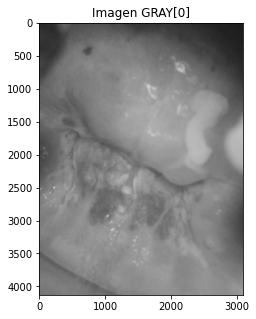

In [ ]:
showrgb(imgCerG[0],'Imagen GRAY'+str([0]),5)

### FLATTEN

In [ ]:
#FLATTEN()
#imgCer1gf=imgCer1g.flatten()
imgCerGF=[]
for i in range(len(imgCerG)):
  imgCerGF.insert(i,(imgCerG[i].flatten()))
  #print(len(imgCerG))

### HISTOGRAM

In [ ]:
#HISTOGRAM
'''hist_imgCerGF=[]
for i in range(len(imgCerGF)):
  hist_imgCerGF.insert(i,plt.hist(imgCerGF[i], bins = 255))
  #plt.show()
  #print(len(hist_imgCerGF))'''

In [ ]:
plt.hist(imgCerGF[0],bins=255)
plt.hist(imgCerGF[1],bins=255)
plt.show()

### UMBRAL

In [ ]:
#UMBRAL
umbral = 140

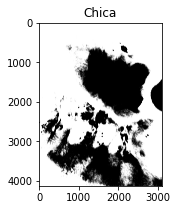

In [ ]:
showrgb(np.uint8((imgCerG[0]<umbral)*255),'Chica',3)

### NEGACIÓN





In [ ]:
imgCerGN=[]
vsimgCerN=[]
for i in range(len(imgCer)):
  imgCerGN.insert(i,(255-imgCerG[i]))
  vsimgCerN.insert(i,(np.hstack((imgCerG[i],imgCerGN[i]))))
  #print(len(imgCerG))

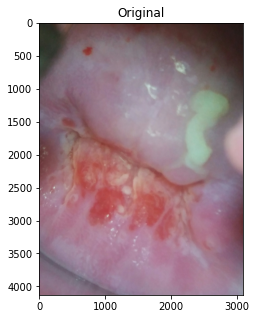

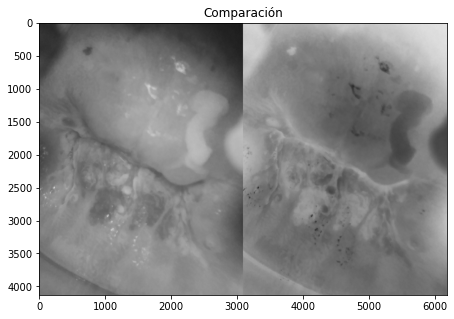

In [ ]:
showrgb(imgCer[0],'Original',5)
showrgb(vsimgCerN[0],'Comparación',5)

### AJUSTE DE CONTRASTE

#### Función Ajuste de contraste

In [ ]:
def stretch_contrastK(image, L,M): #aquí se esta definiendo la función de ajuste
  span = M-L
  K = 255/span
  img_stretch = image[:]
  for i in range(0,np.shape(image)[0]):
    for k in range(0,np.shape(image)[1]):
      pixel_dis = img_stretch[i,k]-L
      if pixel_dis<0:
        img_stretch[i,k] = 0
      else:
        img_stretch[i,k] = pixel_dis
  img_stretch = np.uint8(img_stretch*K)
  return img_stretch

#### .

In [ ]:
#imgCerGS=[]

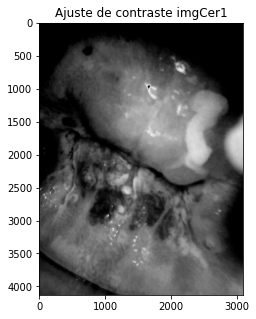

In [ ]:
imgCer1gs = stretch_contrastK(imgCerG[0],L=100, M=200)
showrgb(imgCer1gs,'Ajuste de contraste imgCer1',5)

### Ecualización del histograma

In [ ]:
imgCer1ge=cv2.equalizeHist(imgCer1gs)
showrgb(imgCer[5],'',5)
vs=np.hstack((imgCerG[0],imgCer1ge))
#vs2=np.hstack((imgCer[0],imgCerGN[0]))
#showrgb(imgCer[0],'Original',5)
#showrgb(vs2,'Comparación',10)
#showrgb(vs,'Comparación',10)
showhsv(imgCer[5],'',5)
#showhsv(vs,'Comparación',10)